In [619]:
import time
from datetime import datetime

#measure notebook running time
start_time = time.time()

%matplotlib inline

# backbone
import numpy as np 
from numpy.random import seed
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

# DNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras import metrics
import tensorflow

# SVC
from sklearn.svm import SVC

# xgboost
import xgboost as xgb

# ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

# logistic regression
from sklearn.linear_model import LogisticRegression

#linear
from sklearn.linear_model import SGDClassifier 

#KNN
from sklearn.neighbors import KNeighborsClassifier

# model selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# voting
from sklearn.ensemble import VotingClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set(style='white', context='notebook', palette='deep')



In [620]:
train_data= pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
test_data['Survived']=-1
train_data['Set'] = "Train"
test_data['Set']="Test"
DATA= train_data.append(test_data)
DATA.reset_index(inplace=True)
DATA.dtypes

index            int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Set             object
dtype: object

In [621]:
print("Missing data:\n", DATA.isna().sum())

Missing data:
 index             0
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Set               0
dtype: int64


In [622]:
Index_NaN_age= list(DATA['Age'][DATA['Age'].isnull()].index)
med_age= DATA.Age.median()

for i in Index_NaN_age:
    pred_age= DATA['Age'][((DATA.SibSp==DATA.iloc[i]['SibSp']) & (DATA.Parch ==DATA.iloc[i]['Parch']))].median()
    if np.isnan(pred_age):
        DATA.loc[DATA.index[i],'Age'] =med_age
    else:
        DATA.loc[DATA.index[i],'Age']=pred_age


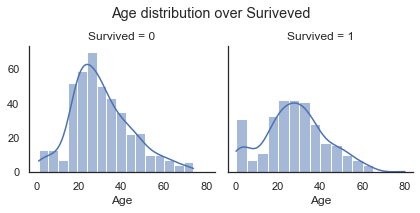

In [623]:
g= sns.FacetGrid(train_data, col='Survived')
g= g.map(sns.histplot, 'Age', kde=True)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution over Suriveved');

In [624]:
def cut_age(age):
    if age<=15:
        return 'child'
    if age>=60:
        return 'senior'
    return 'adult'

DATA['Age_Cat']= DATA.Age.apply(cut_age)



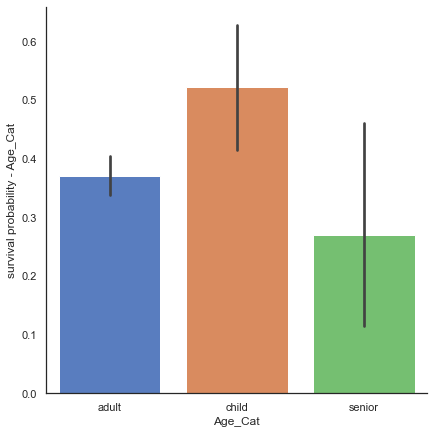

In [625]:
g=sns.catplot(x='Age_Cat', y='Survived', data=DATA[DATA.Set =='Train'], kind='bar', height=6, palette ='muted')
g = g.set_ylabels('survival probability - Age_Cat')

In [626]:
def get_title(sex,name):
    split_name = name.split(",")
    surname = split_name[0].strip(" ")
    title = split_name[1].split('.')[0].strip(' ')
    common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
    if title not in common_titles:
        title = sex
    return title,surname
    
DATA[['Title', 'Surname']]= DATA[['Sex', 'Name']].apply(lambda row: get_title(*row), axis=1, result_type='expand')
DATA.head()


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Set,Age_Cat,Title,Surname
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,adult,Mr,Braund
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train,adult,Mrs,Cumings
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,adult,Miss,Heikkinen
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train,adult,Mrs,Futrelle
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train,adult,Mr,Allen


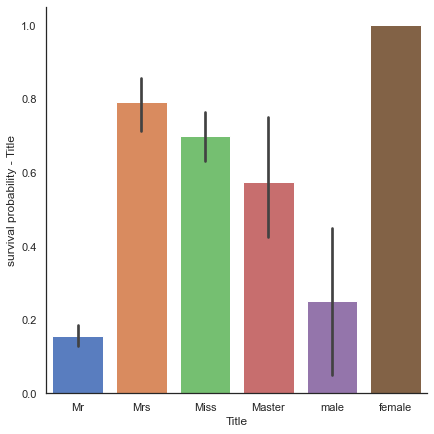

In [627]:
g = sns.catplot(x="Title",y="Survived", data=DATA[DATA.Set == 'Train'], kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability - Title")

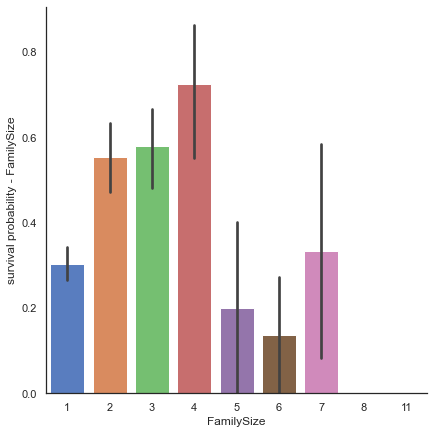

In [628]:
DATA['FamilySize']=DATA.SibSp + DATA.Parch +1
g = sns.catplot(x="FamilySize",y="Survived",data=DATA[DATA.Set == 'Train'], kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability - FamilySize")

In [629]:
def familySize_to_cat(size):
    if size == 1: return 'alone'
    if size >= 2 and size <=4: return 'small'
    if size >=5 and size<=7: return 'medium'
    if size >7: return 'large'

DATA['FamilySizeCategory']=DATA.FamilySize.apply(familySize_to_cat
)

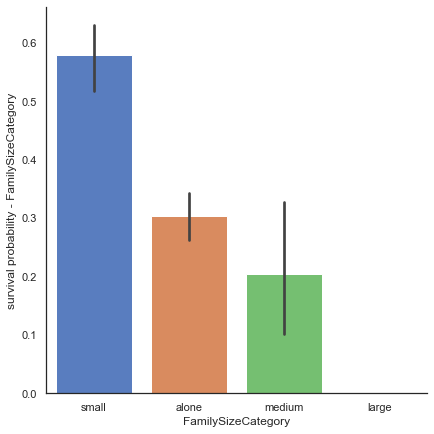

In [630]:
g = sns.catplot(x="FamilySizeCategory",y="Survived",data=DATA[DATA.Set == 'Train'], kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability - FamilySizeCategory")

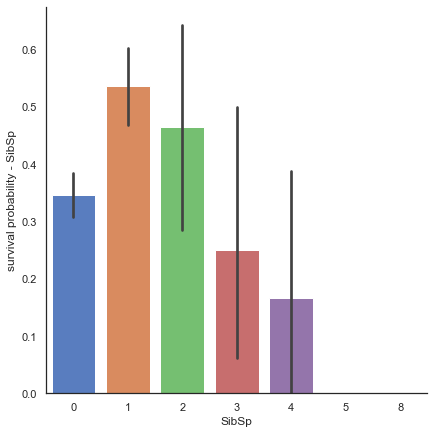

In [631]:
g = sns.catplot(x="SibSp",y="Survived",data=DATA[DATA.Set == 'Train'], kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability - SibSp")

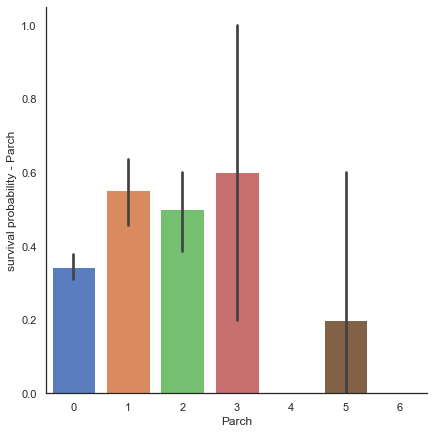

In [632]:
g= sns.catplot(x='Parch', y='Survived', data=DATA[DATA.Set =='Train'], kind='bar', height= 6, palette ='muted')
g= g.set_ylabels('survival probability - Parch')

In [633]:
DATA.Embarked.fillna('S', inplace=True)

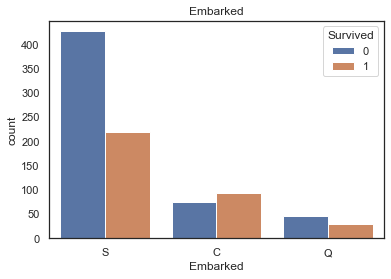

In [634]:
ax = sns.countplot(data = DATA[DATA.Set == 'Train'], x = 'Embarked', hue = "Survived");
ax.set_title("Embarked");

In [635]:
for i in DATA.index:
    
    # adult male
    if DATA.iloc[i]['Sex'] == 'male' and DATA.iloc[i]['Age_Cat'] == 'adult':
        DATA.loc[DATA.index[i],'SG'] = "adult_male"
        #DATA.loc[DATA.index[i],'FSR'] = 0
        DATA.loc[DATA.index[i],'FSR'] = 0.15
        continue

    family = DATA[(DATA.Surname == DATA.iloc[i]["Surname"]) & (DATA.Ticket == DATA.iloc[i]["Ticket"])]
    kids = family[family.Age_Cat == 'child']
    N_kids = len(kids)

    # no_children
    if N_kids == 0:
        DATA.loc[DATA.index[i],'SG'] = "no_children"
        #DATA.loc[DATA.index[i],'FSR'] = 1
        # based on actual ratio
        DATA.loc[DATA.index[i],'FSR'] = 0.75
        continue
        
    if N_kids == 1 and len(family) == 1:
        DATA.loc[DATA.index[i],'SG'] = "solo_kid"
         # based on actual ratio
        DATA.loc[DATA.index[i],'FSR'] = 0.63
        continue

    wc_group =family[family.Title !='Mr']
    survived = wc_group[wc_group.Survived != -1]['Survived'].to_list()

    if len(survived) ==0:
        DATA.loc[DATA.index[i], 'SG'] = 'group_died'
        DATA.loc[DATA.index[i],'FSR'] =0
        continue

    if np.mean(survived) >=0.5:
        DATA.loc[DATA.index[i], 'SG']='group_survived'
    else:
        DATA.loc[DATA.index[i],'SG']='group_died'

    DATA.loc[DATA.index[i], 'FSR']= np.mean(survived)



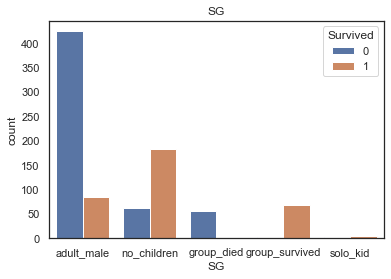

In [636]:
ax = sns.countplot(data = DATA[DATA.Set == 'Train'], x = 'SG', hue = "Survived");
ax.set_title("SG");

In [637]:
DATA[(DATA.Set=='Train') & (DATA.SG =='no_children')]['Survived'].value_counts() /len(DATA[(DATA.Set =='Train') & (DATA.SG =='no_children')]['Survived'])


1    0.746939
0    0.253061
Name: Survived, dtype: float64

In [638]:
DATA[(DATA.Set == 'Train')& (DATA.SG =='solo_kid')]['Survived'].value_counts()/len(DATA[(DATA.Set =='Train')& (DATA.SG =='solo_kid')]['Survived'])

1    0.625
0    0.375
Name: Survived, dtype: float64

In [639]:
DATA[(DATA.Set == 'Train') & (DATA.SG == 'adult_male')]['Survived'].value_counts()/len(DATA[(DATA.Set == 'Train') & (DATA.SG == 'adult_male')]['Survived'])

0    0.833333
1    0.166667
Name: Survived, dtype: float64

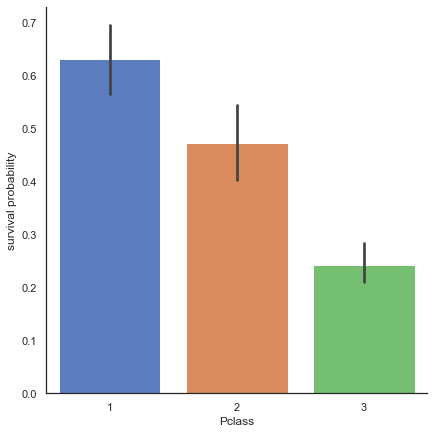

In [640]:
g = sns.catplot(x="Pclass",y="Survived",data=DATA[DATA.Set == 'Train'], kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability")

In [641]:
DATA['RealFare'] =DATA.Fare/ DATA.FamilySize

index_zero =list(DATA['RealFare'][(DATA['RealFare']==0) | (DATA['Fare'].isna())].index)
for i in index_zero:
    med_fare =DATA['RealFare'][(DATA.Pclass==DATA.iloc[i]['Pclass'])].median()
    DATA.loc[DATA.index[i], 'RealFare']= med_fare

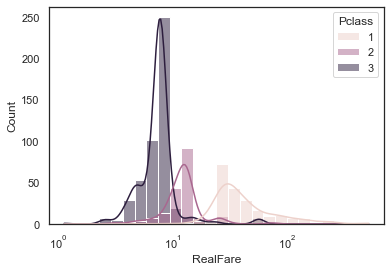

In [642]:
sns.histplot(data = DATA[DATA.Set == 'Train'], x='RealFare', hue='Pclass', kde=True, log_scale=True);

In [643]:
DATA['RealFare'].describe()
DATA['FareBins'] = pd.cut(DATA['RealFare'], [0, 5,10, 25, 50, 100, np.inf], labels = ['0-5', '5-10', '10-25', '25-50', '50-100', '>100'], include_lowest = True)
DATA['FareBins'].value_counts()

5-10      628
10-25     249
25-50     228
0-5       101
50-100     66
>100       37
Name: FareBins, dtype: int64

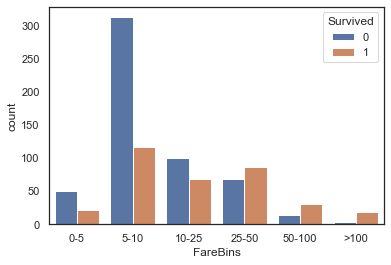

In [644]:
sns.countplot(data = DATA[DATA.Set == 'Train'], x='FareBins',  hue='Survived');

In [645]:
def get_deck(cabin):
    if cabin is np.nan or cabin.startswith('T'):
        return 'X'
    else:
        return cabin[0]
    
DATA.Cabin = DATA.Cabin.apply(get_deck)

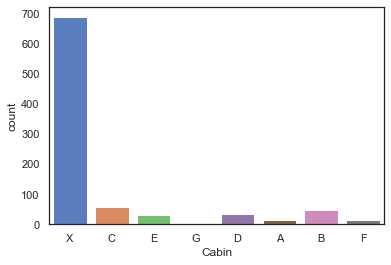

In [646]:
g = sns.countplot(x="Cabin",data=DATA[DATA.Set == 'Train'],palette = "muted");

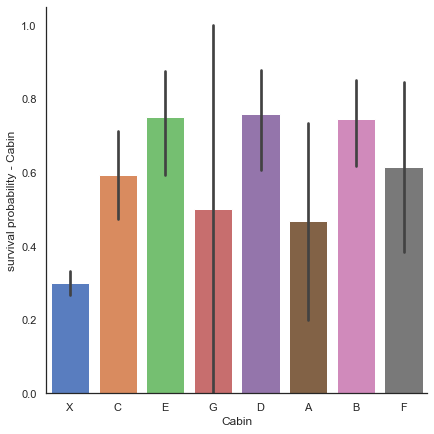

In [647]:
g = sns.catplot(x="Cabin",y="Survived",data=DATA[DATA.Set == 'Train'], kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability - Cabin")

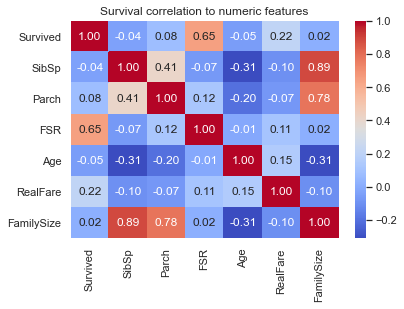

In [648]:
ax = sns.heatmap(DATA[DATA.Set == 'Train'][['Survived',"SibSp","Parch", "FSR","Age","RealFare","FamilySize"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm");
ax.set_title("Survival correlation to numeric features");

In [649]:
mm = MinMaxScaler()
scale_features = ["SibSp","Parch", "Age","RealFare","FamilySize"]
DATA[scale_features] = mm.fit_transform(DATA[scale_features])

In [650]:
_Embarked = DATA[DATA.Set == 'Train'].Embarked
_PClass = DATA[DATA.Set == 'Train'].Pclass
_Cabin = DATA[DATA.Set == 'Train'].Cabin
_Title = DATA[DATA.Set == 'Train'].Title
_Family = DATA[DATA.Set == 'Train'].FamilySizeCategory
_Sex = DATA[DATA.Set == 'Train'].Sex
_Age = DATA[DATA.Set == 'Train'].Age
_Fare = DATA[DATA.Set == 'Train'].FareBins
_SG = DATA[DATA.Set == 'Train'].SG
_FSR = DATA[DATA.Set == 'Train'].FSR

#train
T_Embarked = DATA[DATA.Set == 'Test'].Embarked
T_PClass = DATA[DATA.Set == 'Test'].Pclass
T_Cabin = DATA[DATA.Set == 'Test'].Cabin
T_Title = DATA[DATA.Set == 'Test'].Title
T_Family = DATA[DATA.Set == 'Test'].FamilySizeCategory
T_Sex = DATA[DATA.Set == 'Test'].Sex
T_Age = DATA[DATA.Set == 'Test'].Age
T_Fare = DATA[DATA.Set == 'Test'].FareBins
T_SG = DATA[DATA.Set == 'Test'].SG
T_FSR = DATA[DATA.Set == 'Test'].FSR

In [651]:
drop_this_run = []

In [652]:
redundant_features = ['Ticket', "Name",'Surname','Fare']

DATA.drop([*redundant_features,*drop_this_run], inplace = True, axis = 1)

In [653]:
categorical = ['Cabin','Pclass','FamilySizeCategory','Title','Embarked', "SG", "Age_Cat", "Sex",'FareBins']
categorical = [cat for cat in categorical if cat not in drop_this_run]
DATA = pd.get_dummies(DATA,columns=categorical)

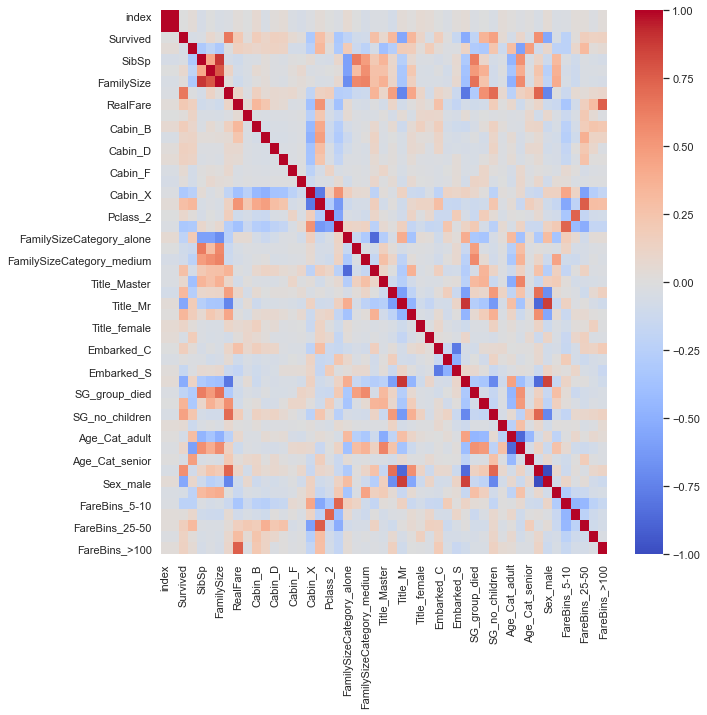

In [654]:
fig, ax = plt.subplots(figsize=(10,10))     
g = sns.heatmap(DATA[DATA.Set == 'Train'].corr(),annot=False, cmap = "coolwarm")

In [655]:
TRAIN = DATA[DATA.Set == 'Train']
TEST = DATA[DATA.Set == 'Test']
PassengerIds = TEST.PassengerId.to_list()
TEST = TEST.drop(['PassengerId','Set',"Survived",'index'], axis = 1)
y = TRAIN.Survived
X = TRAIN.drop(['Survived','PassengerId','Set','index'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 13, stratify=y)


In [656]:
X.head()

,Age,SibSp,Parch,FamilySize,FSR,RealFare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Age_Cat_child,Age_Cat_senior,Sex_female,Sex_male,FareBins_0-5,FareBins_5-10,FareBins_10-25,FareBins_25-50,FareBins_50-100,FareBins_>100
0,0.273456,0.125,0.0,0.1,0.15,0.004918,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0.473882,0.125,0.0,0.1,0.75,0.067546,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,0.323563,0.000,0.0,0.0,0.75,0.013329,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.436302,0.125,0.0,0.1,0.75,0.049762,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0.436302,0.000,0.0,0.0,0.15,0.013574,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [657]:
def plot_CM(model, clf):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,6))
    fig.suptitle(clf)
    cm_train=confusion_matrix(y_train, model.predict(X_train), normalize = 'pred', labels = model.classes_)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
    disp_train.plot(ax=ax1)
    disp_train.ax_.set_title('Train')
    cm_test=confusion_matrix(y_test, model.predict(X_test), normalize = 'pred', labels = model.classes_)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
    disp_test.plot(ax=ax2)
    disp_test.ax_.set_title('Test')
    plt.show()

In [658]:
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show() 

In [659]:
seed(13)
tensorflow.random.set_seed(13)

dnn_model = Sequential()
n_cols = X.shape[1]
dnn_model.add(Dense(128, activation="relu", input_shape = (n_cols,))) 
dnn_model.add(Dense(16, activation="relu"))
dnn_model.add(Dense(1, activation="sigmoid"))              
dnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 128)               6016      
_________________________________________________________________
dense_40 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 17        
Total params: 8,097
Trainable params: 8,097
Non-trainable params: 0
_________________________________________________________________


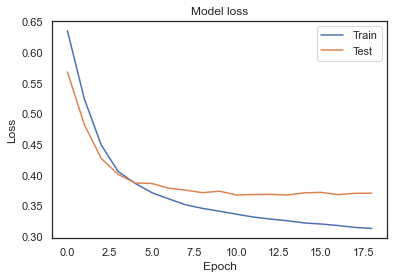

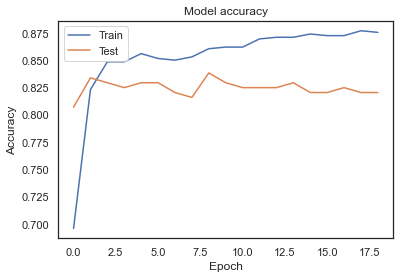

7/7 [==============================] - 0s 665us/step - loss: 0.3711 - accuracy: 0.8206
Train accuracy: 87.87 %
Accuracy: 82.06 %
Overfit: 5.81 % 


In [660]:
dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=10, monitor='val_accuracy')
dnn_model.fit(X_train,y_train, validation_data=(X_test,y_test), callbacks=[early_stopping_monitor], epochs=200,batch_size=64, verbose=0)

plot_loss(dnn_model.history.history['loss'], dnn_model.history.history['val_loss'])
plot_accuracy(dnn_model.history.history['accuracy'], dnn_model.history.history['val_accuracy'])

_, train_dnn_accuracy = dnn_model.evaluate(X_train, y_train)
_, dnn_accuracy = dnn_model.evaluate(X_test, y_test)
print('Train accuracy: {:.2f} %'.format(train_dnn_accuracy*100))
print('Accuracy: {:.2f} %'.format(dnn_accuracy*100))
print('Overfit: {:.2f} % '.format((train_dnn_accuracy - dnn_accuracy)*100))

In [661]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

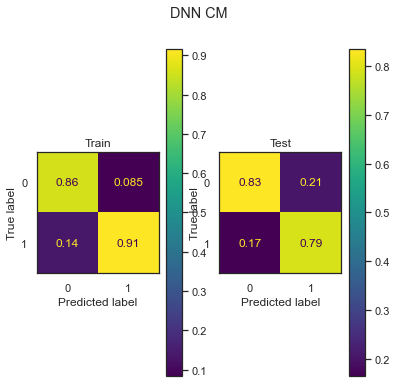

In [662]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,6))
fig.suptitle('DNN CM')
cm_train=confusion_matrix(y_train, np.rint(dnn_model.predict(X_train)), normalize = 'pred', labels =[0,1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0,1])
disp_train.plot(ax=ax1)
disp_train.ax_.set_title('Train')
cm_test=confusion_matrix(y_test, np.rint(dnn_model.predict(X_test)), normalize = 'pred', labels = [0,1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0,1])
disp_test.plot(ax=ax2)
disp_test.ax_.set_title('Test')
plt.show()

In [663]:

rf_model = RandomForestClassifier(max_depth=4, n_estimators= 75, max_features='auto')
rf_model.fit(X_train, y_train)
rf_train_score = rf_model.score(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)
print("Train: {:.2f} %".format(rf_train_score * 100))
print("Test: {:.2f} %".format(rf_accuracy*100))
print('Overfit: {:.2f} %'.format((rf_train_score-rf_accuracy)*100))

Train: 85.03 %
Test: 83.41 %
Overfit: 1.62 %


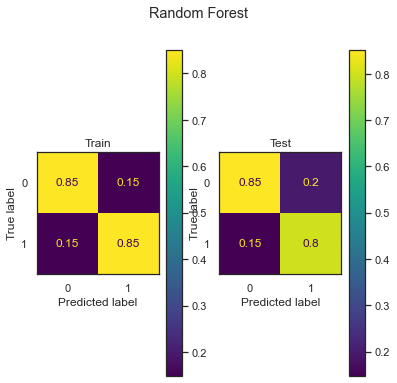

In [664]:
plot_CM(rf_model, "Random Forest")

RF_best_features: ['FSR', 'Title_Mr', 'Sex_female', 'Sex_male', 'SG_adult_male', 'SG_group_survived', 'RealFare', 'SG_group_died', 'SG_no_children'] 9


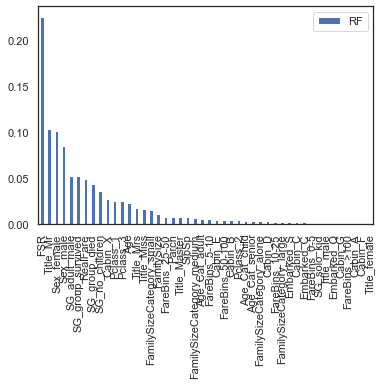

In [665]:
features = {}
for feature, importance in zip(X_train.columns, rf_model.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"RF":features})
importances.sort_values("RF", ascending = False, inplace=True)
RF_best_features = list(importances[importances.RF > 0.03].index)
importances.plot.bar()
print("RF_best_features:",RF_best_features, len(RF_best_features))

In [666]:
xgb_model = xgb.XGBClassifier(learning_rate= 0.01, 
                              max_depth= 10, n_estimators= 250, min_child_weight = 0.5, reg_lambda= 100, subsample= 0.9, 
                              gamma=0.5,colsample_bytree = 0.4, colsample_bylevel = 0.6,
                              use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_train_score = xgb_model.score(X_train, y_train)
xgb_accuracy = xgb_model.score(X_test, y_test)
print("Train: {:.2f} %".format(xgb_train_score*100))
print("Test: {:.2f} %".format(xgb_accuracy*100))
print('Overfit: {:.2f} %'.format((xgb_train_score-xgb_accuracy)*100))

[13:16:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train: 84.88 %
Test: 83.41 %
Overfit: 1.47 %


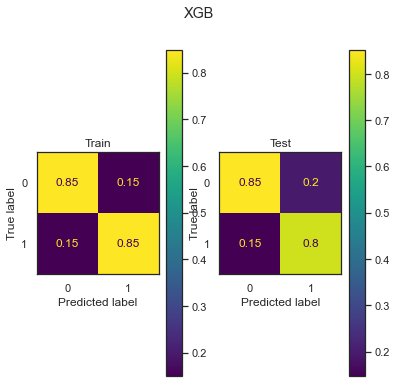

In [667]:
plot_CM(xgb_model, "XGB")

In [668]:
weights = xgb_model.get_booster().get_score(importance_type="gain")
weights = [(weights[w],w) for w in sorted(weights, key=weights.get, reverse=True)]
XGB_features = [w[1] for w in weights]
print("XGB best features", XGB_features)

XGB best features ['FSR', 'Sex_female', 'Sex_male', 'SG_adult_male', 'Title_Mr', 'SG_no_children', 'Title_Miss', 'Pclass_1', 'SG_group_survived', 'Title_Mrs', 'SG_group_died', 'Cabin_X', 'Pclass_3', 'FamilySize', 'RealFare', 'Age_Cat_child', 'FareBins_25-50', 'FamilySizeCategory_small', 'FamilySizeCategory_medium', 'SibSp', 'Age', 'Title_Master', 'Cabin_B', 'Age_Cat_adult', 'Age_Cat_senior', 'Cabin_E', 'FareBins_0-5', 'FamilySizeCategory_large', 'Title_male', 'FareBins_50-100', 'Embarked_S', 'Parch', 'Cabin_D', 'FareBins_10-25', 'Embarked_C', 'Pclass_2', 'FareBins_>100', 'SG_solo_kid', 'Embarked_Q', 'Cabin_C', 'FareBins_5-10', 'Cabin_G', 'Cabin_A']


In [669]:
SVM_model = SVC(C = 100, gamma= 0.001, kernel='rbf', probability=True, random_state = 13)
SVM_model.fit(X_train, y_train)
svm_train_score = SVM_model.score(X_train, y_train)
SVM_accuracy = SVM_model.score(X_test, y_test)
print("Train: {:.2f} %".format(svm_train_score*100))
print("Test: {:.2f} %".format(SVM_accuracy*100))
print('Overfit: {:.2f} %'.format((svm_train_score - SVM_accuracy)*100))

Train: 85.03 %
Test: 85.20 %
Overfit: -0.17 %


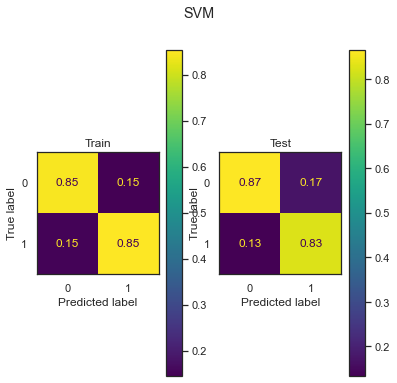

In [670]:
plot_CM(SVM_model, "SVM")

SVM_best_features: ['FSR', 'Title_Mr', 'Sex_female', 'Sex_male', 'SG_adult_male', 'SG_group_survived', 'RealFare', 'SG_group_died', 'SG_no_children'] 9


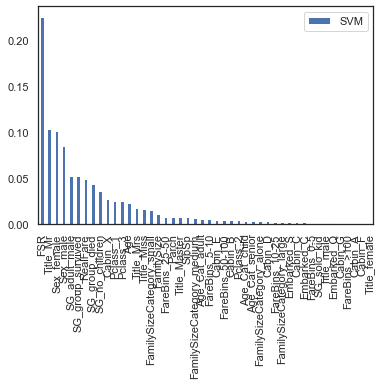

In [671]:
features = {}
for feature, importance in zip(X_train.columns, rf_model.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"SVM":features})
importances.sort_values("SVM", ascending = False, inplace=True)
importances
SVM_best_features = list(importances[importances.SVM > 0.03].index)
importances.plot.bar()
print("SVM_best_features:",SVM_best_features, len(SVM_best_features))

In [672]:
LR_model = LogisticRegression(solver='liblinear', C=1000, penalty='l2', random_state=13)
LR_model.fit(X_train, y_train)
LR_train_score = LR_model.score(X_train, y_train)
LR_accuracy = LR_model.score(X_test, y_test)
print("Train: {:.2f} %".format(LR_train_score*100))
print("Test: {:.2f} %".format(LR_accuracy*100))
print('Overfit: {:.2f} %'.format((LR_train_score-LR_accuracy)*100))

Train: 86.23 %
Test: 82.06 %
Overfit: 4.16 %


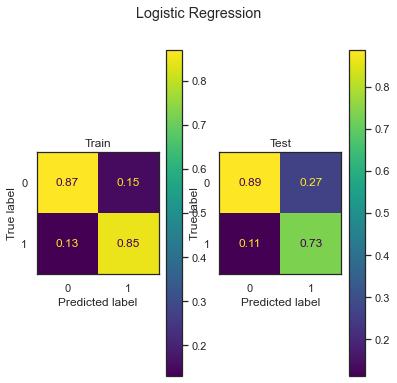

In [673]:
plot_CM(LR_model, "Logistic Regression")

LR_best_features: ['FSR', 'Title_Mr', 'Sex_female', 'Sex_male', 'SG_adult_male', 'SG_group_survived', 'RealFare', 'SG_group_died', 'SG_no_children'] 9


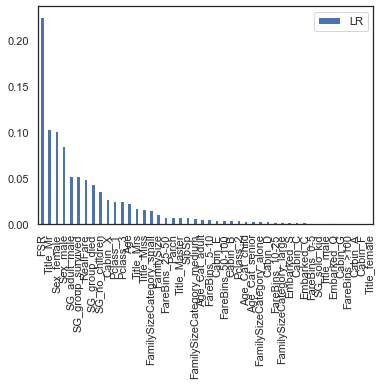

In [674]:
features = {}
for feature, importance in zip(X_train.columns, rf_model.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"LR":features})
importances.sort_values("LR", ascending = False, inplace=True)
importances
LR_best_features = list(importances[importances.LR > 0.03].index)
importances.plot.bar()
print("LR_best_features:",LR_best_features, len(LR_best_features))

In [675]:
KNN_model = KNeighborsClassifier(n_neighbors=12,metric='manhattan',weights='uniform')
KNN_model.fit(X_train, y_train)
KNN_train_score = KNN_model.score(X_train, y_train)
KNN_accuracy = KNN_model.score(X_test, y_test)
print("Train: {:.2f} %".format(KNN_train_score*100))
print("Test: {:.2f} %".format(KNN_accuracy*100))
print('Overfit: {:.2f} %'.format((KNN_train_score-KNN_accuracy)*100))

Train: 86.83 %
Test: 83.86 %
Overfit: 2.97 %


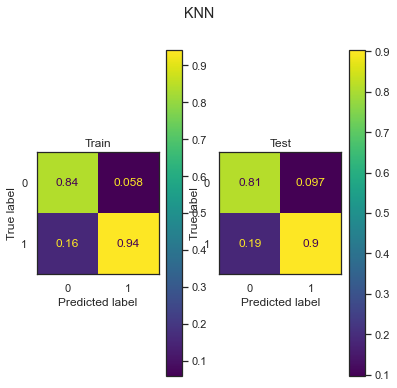

In [676]:
plot_CM(KNN_model, "KNN")

KNN_best_features: ['FSR', 'Title_Mr', 'Sex_female', 'Sex_male', 'SG_adult_male', 'SG_group_survived', 'RealFare', 'SG_group_died', 'SG_no_children'] 9


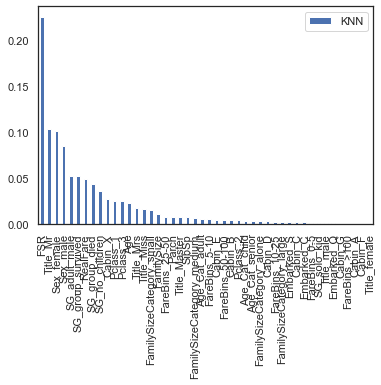

In [677]:
features = {}
for feature, importance in zip(X_train.columns, rf_model.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"KNN":features})
importances.sort_values("KNN", ascending = False, inplace=True)
importances
KNN_best_features = list(importances[importances.KNN > 0.03].index)
importances.plot.bar()
print("KNN_best_features:",KNN_best_features, len(KNN_best_features))

In [678]:
ADA_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, max_features=0.7, min_samples_split= 5), 
                               n_estimators=100, learning_rate=0.01, random_state=13) 
ADA_model.fit(X_train,y_train)
ADA_train_score = ADA_model.score(X_train, y_train)
ADA_accuracy = ADA_model.score(X_test, y_test)
print("Train: {:.2f} %".format(ADA_train_score*100))
print("Test: {:.2f} %".format(ADA_accuracy*100))
print('Overfit: {:.2f} %'.format((ADA_train_score - ADA_accuracy)*100))

Train: 93.56 %
Test: 82.96 %
Overfit: 10.60 %


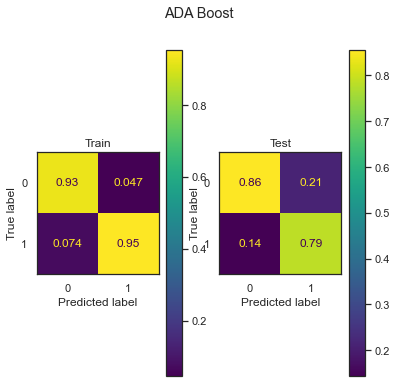

In [679]:
plot_CM(ADA_model, "ADA Boost")

ADA_best_features: ['FSR', 'Title_Mr', 'Sex_female', 'Sex_male', 'SG_adult_male', 'SG_group_survived', 'RealFare', 'SG_group_died', 'SG_no_children'] 9


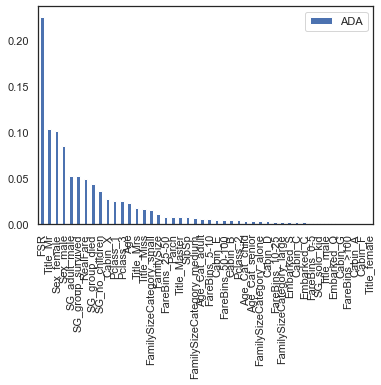

In [680]:
features = {}
for feature, importance in zip(X_train.columns, rf_model.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"ADA":features})
importances.sort_values("ADA", ascending = False, inplace=True)
importances
ADA_best_features = list(importances[importances.ADA > 0.03].index)
importances.plot.bar()
print("ADA_best_features:",ADA_best_features, len(ADA_best_features))

In [681]:
ETC_model = ExtraTreesClassifier(max_features=10, n_estimators=100,  max_depth = 3, random_state = 13)
ETC_model.fit(X_train, y_train)
ETC_train_score = ETC_model.score(X_train, y_train)
ETC_accuracy = ETC_model.score(X_test, y_test)
print("Train: {:.2f} %".format(ETC_train_score*100))
print("Test: {:.2f} %".format(ETC_accuracy*100))
print('Overfit: {:.2f} %'.format((ETC_train_score-ETC_accuracy)*100))

Train: 84.88 %
Test: 83.41 %
Overfit: 1.47 %


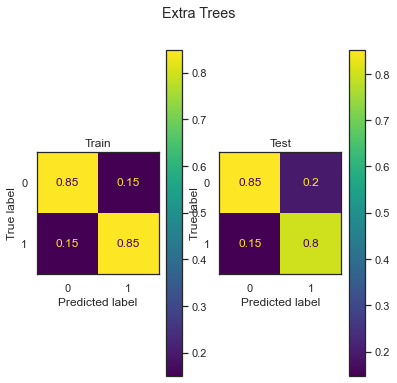

In [682]:
plot_CM(ETC_model, "Extra Trees")

ETC_best_features: ['FSR', 'Title_Mr', 'Sex_female', 'Sex_male', 'SG_adult_male', 'SG_group_survived', 'RealFare', 'SG_group_died', 'SG_no_children'] 9


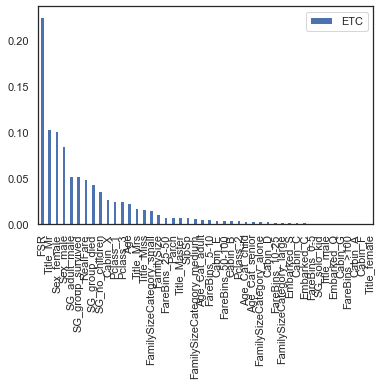

In [683]:
features = {}
for feature, importance in zip(X_train.columns, rf_model.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"ETC":features})
importances.sort_values("ETC", ascending = False, inplace=True)
importances
ETC_best_features = list(importances[importances.ETC > 0.03].index)
importances.plot.bar()
print("ETC_best_features:",ETC_best_features, len(ETC_best_features))

In [684]:
GBC_model = GradientBoostingClassifier(learning_rate=0.3,max_depth=4, max_features=0.6, min_samples_leaf=95, n_estimators=100, random_state = 13)
GBC_model.fit(X_train, y_train)
GBC_train_score = GBC_model.score(X_train, y_train)
GBC_accuracy = GBC_model.score(X_test, y_test)
print("Train: {:.2f} %".format(GBC_train_score*100))
print("Test: {:.2f} %".format(GBC_accuracy*100))
print('Overfit: {:.2f} %'.format((GBC_train_score - GBC_accuracy)*100))

Train: 88.02 %
Test: 84.30 %
Overfit: 3.72 %


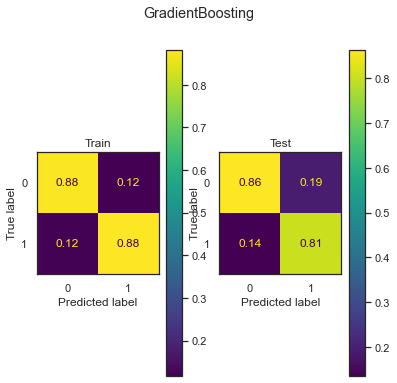

In [685]:
plot_CM(GBC_model, "GradientBoosting")


GBC_best_features: ['FSR', 'Title_Mr', 'Sex_female', 'Sex_male', 'SG_adult_male', 'SG_group_survived', 'RealFare', 'SG_group_died', 'SG_no_children'] 9


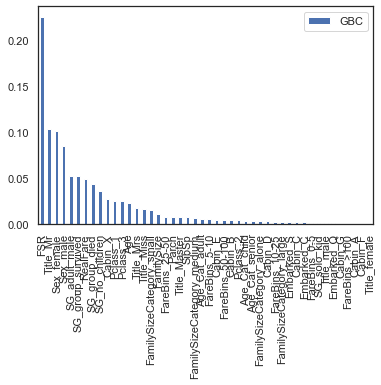

In [686]:
features = {}
for feature, importance in zip(X_train.columns, rf_model.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"GBC":features})
importances.sort_values("GBC", ascending = False, inplace=True)
GBC_best_features = list(importances[importances.GBC > 0.03].index)
importances.plot.bar()
print("GBC_best_features:",GBC_best_features, len(GBC_best_features))

In [687]:
SGD_model = SGDClassifier(alpha=0.001, penalty='elasticnet', loss='modified_huber', random_state=13)
SGD_model.fit(X_train, y_train)
SGD_train_score = SGD_model.score(X_train, y_train)
SGD_accuracy = SGD_model.score(X_test, y_test)
print("Train: {:.2f} %".format(SGD_train_score*100))
print("Test: {:.2f} %".format(SGD_accuracy*100))
print('Overfit: {:.2f} %'.format((SGD_train_score-SGD_accuracy)*100))

Train: 85.48 %
Test: 84.30 %
Overfit: 1.17 %


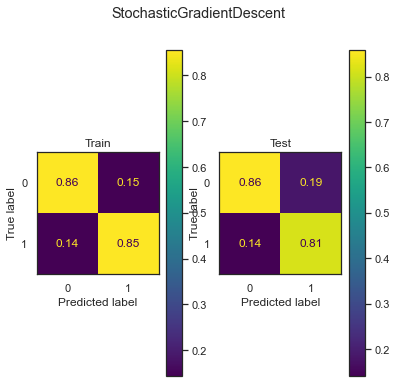

In [688]:
plot_CM(SGD_model, "StochasticGradientDescent")

SGD_best_features: ['FSR', 'Title_Mr', 'Sex_female', 'Sex_male', 'SG_adult_male', 'SG_group_survived', 'RealFare', 'SG_group_died', 'SG_no_children'] 9


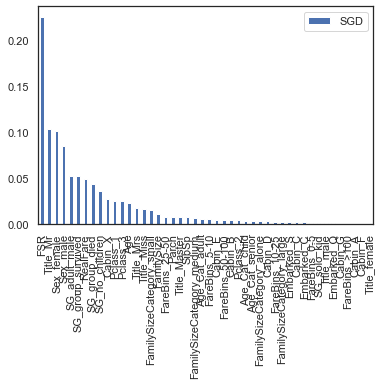

In [689]:
features = {}
for feature, importance in zip(X_train.columns, rf_model.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"SGD":features})
importances.sort_values("SGD", ascending = False, inplace=True)
SGD_best_features = list(importances[importances.SGD > 0.03].index)
importances.plot.bar()
print("SGD_best_features:",SGD_best_features, len(SGD_best_features))

In [690]:
DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=3,max_features=0.9, min_samples_leaf=8,min_samples_split=5, random_state=13)
DT_model.fit(X_train, y_train)
DT_train_score = DT_model.score(X_train, y_train)
DT_accuracy = DT_model.score(X_test, y_test)
print("Train: {:.2f} %".format(DT_train_score*100))
print("Test: {:.2f} %".format(DT_accuracy*100))
print('Overfit: {:.2f} %'.format((DT_train_score - DT_accuracy)*100))

Train: 84.88 %
Test: 83.41 %
Overfit: 1.47 %


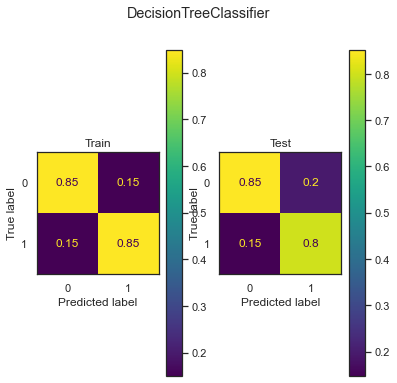

In [691]:
plot_CM(DT_model, "DecisionTreeClassifier")

DT_best_features: ['FSR', 'Title_Mr', 'Sex_female', 'Sex_male', 'SG_adult_male', 'SG_group_survived', 'RealFare', 'SG_group_died', 'SG_no_children'] 9


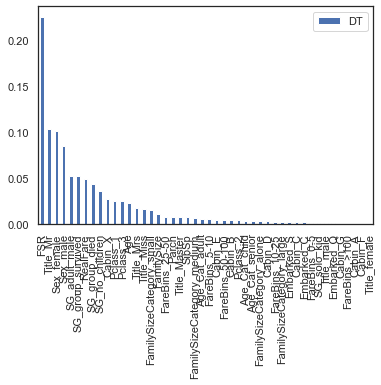

In [692]:
features = {}
for feature, importance in zip(X_train.columns, rf_model.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"DT":features})
importances.sort_values("DT", ascending = False, inplace=True)
DT_best_features = list(importances[importances.DT > 0.03].index)
importances.plot.bar()
print("DT_best_features:",DT_best_features, len(DT_best_features))

In [693]:
L = min(len(RF_best_features), len(XGB_features), len(ADA_best_features), len(KNN_best_features), len(LR_best_features), len(SVM_best_features), 
        len(ETC_best_features), len(GBC_best_features), len(SGD_best_features), len(DT_best_features))

TF = pd.DataFrame({"ADA":ADA_best_features[:L], "KNN": KNN_best_features[:L], "LR": LR_best_features[:L],
                  "SVM":SVM_best_features[:L], "XGB":XGB_features[:L], "RF":RF_best_features[:L],
                  "ETC":ETC_best_features[:L], "GBC":GBC_best_features[:L], "SGD":SGD_best_features[:L],
                  "DT": DT_best_features} )
TF

,ADA,KNN,LR,SVM,XGB,RF,ETC,GBC,SGD,DT
0,FSR,FSR,FSR,FSR,FSR,FSR,FSR,FSR,FSR,FSR
1,Title_Mr,Title_Mr,Title_Mr,Title_Mr,Sex_female,Title_Mr,Title_Mr,Title_Mr,Title_Mr,Title_Mr
2,Sex_female,Sex_female,Sex_female,Sex_female,Sex_male,Sex_female,Sex_female,Sex_female,Sex_female,Sex_female
3,Sex_male,Sex_male,Sex_male,Sex_male,SG_adult_male,Sex_male,Sex_male,Sex_male,Sex_male,Sex_male
4,SG_adult_male,SG_adult_male,SG_adult_male,SG_adult_male,Title_Mr,SG_adult_male,SG_adult_male,SG_adult_male,SG_adult_male,SG_adult_male
5,SG_group_survived,SG_group_survived,SG_group_survived,SG_group_survived,SG_no_children,SG_group_survived,SG_group_survived,SG_group_survived,SG_group_survived,SG_group_survived
6,RealFare,RealFare,RealFare,RealFare,Title_Miss,RealFare,RealFare,RealFare,RealFare,RealFare
7,SG_group_died,SG_group_died,SG_group_died,SG_group_died,Pclass_1,SG_group_died,SG_group_died,SG_group_died,SG_group_died,SG_group_died
8,SG_no_children,SG_no_children,SG_no_children,SG_no_children,SG_group_survived,SG_no_children,SG_no_children,SG_no_children,SG_no_children,SG_no_children


In [694]:
print("Accuracy Scores:")
print("==========================================================")
print("DNN: {:.3f}".format(dnn_accuracy))
print("RandomForest: {:.3f}".format(rf_accuracy))
print("XGBoost classifier: {:.3f}".format(xgb_accuracy))
print("SVM classifier: {:.3f}".format(SVM_accuracy))
print("LR classifier: {:.3f}".format(LR_accuracy))
print("KNN classifier: {:.3f}".format(KNN_accuracy))
print("ADA Boost classifier: {:.3f}".format(ADA_accuracy))
print("Extra Tree classifier: {:.3f}".format(ETC_accuracy))
print("Gradient Boosting classifier: {:.3f}".format(GBC_accuracy))
print("Stochastic Gradient descent: {:.3f}".format(SGD_accuracy))
print("Decision Tree classifier: {:.3f}".format(DT_accuracy))
print("==========================================================")

Accuracy Scores:
DNN: 0.821
RandomForest: 0.834
XGBoost classifier: 0.834
SVM classifier: 0.852
LR classifier: 0.821
KNN classifier: 0.839
ADA Boost classifier: 0.830
Extra Tree classifier: 0.834
Gradient Boosting classifier: 0.843
Stochastic Gradient descent: 0.843
Decision Tree classifier: 0.834


In [695]:
# DNN
dnn_predictions = np.rint(dnn_model.predict(TEST))[:,0]

# the rest
xgb_predictions = xgb_model.predict(TEST) 
rf_predictions = rf_model.predict(TEST) 
svm_predictions = SVM_model.predict(TEST) 
lr_predictions = LR_model.predict(TEST) 
knn_predictions = KNN_model.predict(TEST)
ada_predictions = ADA_model.predict(TEST)
etc_predictions = ETC_model.predict(TEST)
gbc_predictions = GBC_model.predict(TEST)
sgd_predictions = SGD_model.predict(TEST)
dt_predictions = DT_model.predict(TEST)

In [697]:
def vote(votes):
    #weight_dict = {'DNN':1,'XGB':1,'RF':1,'LR':1,"SVM":1, "KNN":1, "ADA":1, "ETC":1, "GBC": 1, "SGD":1, "DT":1}
    weight_dict = {'DNN':1,'XGB':1,'RF':1,"SVM":1, "KNN":1, "ADA":1, "ETC":1, "GBC": 1, "SGD":1, "DT":1}
    weights = np.array(list(weight_dict.values()))
    sw = weights.sum()
    v = [v * weights[i] for i,v in enumerate(votes)]
    return sum(v)/ sw

ALL_PREDICTIONS = pd.DataFrame({'PassengerId': PassengerIds,
                                'DNN': dnn_predictions, 'XGB': xgb_predictions, 'RF':rf_predictions,
                                #'LR': lr_predictions, 
                                "SVM":svm_predictions, "KNN":knn_predictions, "ADA":ada_predictions, "ETC":etc_predictions, "GBC":gbc_predictions,
                               "SGD":sgd_predictions, "DT":dt_predictions,
                               'Sex':T_Sex,'Fare':T_Fare,  "Title": T_Title, "PClass": T_PClass, "SG":T_SG, "FSR":T_FSR})


#clfs = ['DNN','XGB','RF','LR',"SVM", "KNN", "ADA", "ETC", "GBC", "SGD", "DT"]
clfs = ['DNN','XGB','RF',"SVM", "KNN", "ADA", "ETC", "GBC", "SGD", "DT"]
                   

ALL_PREDICTIONS['Vote'] = ALL_PREDICTIONS[clfs].apply(lambda row: vote(row), axis = 1)
#ALL_PREDICTIONS['Predict'] = ALL_PREDICTIONS.Vote.apply(lambda row: int(np.rint(row)))
ALL_PREDICTIONS['Predict'] = ALL_PREDICTIONS.Vote.apply(lambda row: int(np.rint(row+0.001)))
vc_predictions = ALL_PREDICTIONS.Predict
ALL_PREDICTIONS.head(25)

,PassengerId,DNN,XGB,RF,SVM,KNN,ADA,ETC,GBC,SGD,DT,Sex,Fare,Title,PClass,SG,FSR,Vote,Predict
891,892,0.0,0,0,0,0,0,0,0,0,0,male,5-10,Mr,3,adult_male,0.15,0.0,0
892,893,0.0,1,1,1,0,0,1,0,0,1,female,0-5,Mrs,3,no_children,0.75,0.5,1
893,894,0.0,0,0,0,0,1,0,0,0,0,male,5-10,Mr,2,no_children,0.75,0.1,0
894,895,0.0,0,0,0,0,0,0,0,0,0,male,5-10,Mr,3,adult_male,0.15,0.0,0
895,896,1.0,1,1,1,1,1,1,1,1,1,female,0-5,Mrs,3,group_survived,1.00,1.0,1
896,897,0.0,0,0,0,0,0,0,0,0,0,male,5-10,Mr,3,solo_kid,0.63,0.0,0
897,898,1.0,1,1,1,1,1,1,1,1,1,female,5-10,Miss,3,no_children,0.75,1.0,1
898,899,0.0,0,0,0,0,0,0,0,0,0,male,5-10,Mr,2,adult_male,0.15,0.0,0
899,900,1.0,1,1,1,0,1,1,1,1,1,female,5-10,Mrs,3,no_children,0.75,0.9,1
900,901,0.0,0,0,0,0,0,0,0,0,0,male,5-10,Mr,3,adult_male,0.15,0.0,0


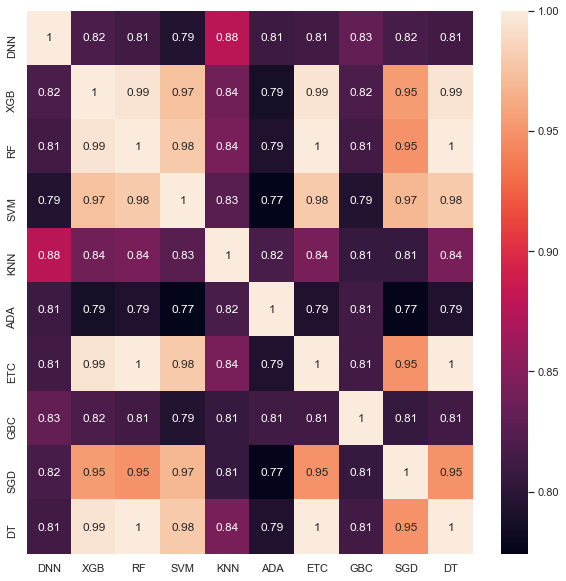

In [698]:
fig, ax = plt.subplots(figsize=(10,10))  
g= sns.heatmap(ALL_PREDICTIONS[clfs].corr(),annot=True)

In [699]:
# predict train
# DNN
predicted_dnn = dnn_model.predict(X)
dnn_train = [int(np.rint(p)) for p in predicted_dnn]
#rest
xgb_train = xgb_model.predict(X) 
rf_train = rf_model.predict(X) 
svm_train = SVM_model.predict(X) 
lr_train = LR_model.predict(X) 
knn_train = KNN_model.predict(X) 
ada_train = ADA_model.predict(X)
etc_train = ETC_model.predict(X)
gbc_train = GBC_model.predict(X)
sgd_train = SGD_model.predict(X)
dt_train = DT_model.predict(X)

#check where I have failed

TRAIN_PREDICTIONS = pd.DataFrame({'Survived':train_data.Survived,'Age': _Age,'Fare':_Fare,
                                  "Title": _Title,
                                  "PClass": _PClass, 
                                  "SG": _SG, "FSR":_FSR,
                                  'XGB': xgb_train, 'RF':rf_train,
                                  #'LR': lr_train, 
                                  "SVM":svm_train, "ADA":ada_train, "DNN":dnn_train,
                                 "GBC":gbc_train, "SGD":sgd_train, "ETC":etc_train, "DT":dt_train, "KNN":knn_train})

TRAIN_PREDICTIONS['Vote'] = TRAIN_PREDICTIONS[clfs].apply(lambda row: vote(row), axis = 1)
#TRAIN_PREDICTIONS['VC'] = TRAIN_PREDICTIONS.Vote.apply(lambda row: int(np.rint(row)))
TRAIN_PREDICTIONS['VC'] = TRAIN_PREDICTIONS.Vote.apply(lambda row: int(np.rint(row+0.001)))

wrong = TRAIN_PREDICTIONS[TRAIN_PREDICTIONS.Survived != TRAIN_PREDICTIONS.VC]
print(len(wrong))
wrong[(wrong.Vote >= 0.4) & (wrong.Vote <= 0.6)].head(20)
#wrong['Survived'].value_counts()
#wrong[(wrong.Vote == 0.5)].head(20)
#wrong.head(20)

136


,Survived,Age,Fare,Title,PClass,SG,FSR,XGB,RF,SVM,ADA,DNN,GBC,SGD,ETC,DT,KNN,Vote,VC
38,0,0.223350,5-10,Miss,3,no_children,0.75,1,1,1,0,0,0,1,1,1,0,0.6,1
40,0,0.498935,0-5,Mrs,3,no_children,0.75,1,1,1,0,0,0,0,1,1,0,0.5,1
113,0,0.248403,0-5,Miss,3,no_children,0.75,1,1,1,0,0,0,1,1,1,0,0.6,1
132,0,0.586622,5-10,Mrs,3,no_children,0.75,1,1,1,0,0,0,1,1,1,0,0.6,1
276,0,0.561568,5-10,Miss,3,no_children,0.75,1,1,1,0,0,0,1,1,1,0,0.6,1
293,0,0.298509,5-10,Miss,3,no_children,0.75,1,1,1,0,0,0,1,1,1,0,0.6,1
390,1,0.448829,25-50,Mr,1,adult_male,0.15,0,0,0,1,1,1,1,0,0,0,0.4,0
402,0,0.260929,0-5,Miss,3,no_children,0.75,1,1,1,0,0,0,1,1,1,0,0.6,1
404,0,0.248403,5-10,Miss,3,no_children,0.75,1,1,1,0,0,0,1,1,1,0,0.6,1
474,0,0.273456,5-10,Miss,3,no_children,0.75,1,1,1,0,0,0,1,1,1,0,0.6,1


In [701]:
# don't forget to enter best predictions ...
#output = pd.DataFrame({'PassengerId': PassengerIds, 'Survived': xgb_predictions})
#output = pd.DataFrame({'PassengerId': PassengerIds, 'Survived': ada_predictions})
# output = pd.DataFrame({'PassengerId': PassengerIds, 'Survived': dnn_predictions})
output = pd.DataFrame({'PassengerId': PassengerIds, 'Survived': vc_predictions})
#output = pd.DataFrame({'PassengerId': PassengerIds, 'Survived': rf_predictions})

output.head(30)

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0


In [702]:
#output
output.to_csv('submission.csv', index=False)

Submission was successfully saved!


In [703]:
end_time = time.time()
print("Notebook run time: {:.1f} seconds. Finished at {}".format(end_time - start_time, datetime.now()) )

Notebook run time: 138.2 seconds. Finished at 2021-11-09 13:19:00.802705
